# DATA 201: Project 1
### Aida Bagheri Hamaneh, Elizabeth Click, Isabel Decolin

For this project, we are using the Life Expectancy dataset. This dataset was retrieved from Kaggle (https://www.kaggle.com/kumarajarshi/life-expectancy-who). It represents data collected by the WHO (World Health Organization) from 2000-2015. The data lists various countries, their life expectancies as well as information about various factors that can affect the life expectancy over a period of time.

Questions:

- Which economic factors affect life expectancy?
- What is the correlation among these factors?
- How does life expectancy change over time?
- Can we estimate life expectancy using a linear function?
- Does life expectancy appear to be normally distributed?

## Install Packages 

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Load Dataset

In [2]:
life = pd.read_csv('Life Expectancy Data.csv')


In [3]:
print(life.head())
print(life.info())
life.describe()
life.shape


       Country  Year  ... Income composition of resources  Schooling
0  Afghanistan  2015  ...                           0.479       10.1
1  Afghanistan  2014  ...                           0.476       10.0
2  Afghanistan  2013  ...                           0.470        9.9
3  Afghanistan  2012  ...                           0.463        9.8
4  Afghanistan  2011  ...                           0.454        9.5

[5 rows x 22 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths    

(2938, 22)

## Data Cleaning 

In [4]:
life.columns = life.columns.str.lower()
life.columns = life.columns.str.replace("\r","")
life.columns = life.columns.str.replace("\n","")
life.columns = life.columns.str.replace("-", "_")
life.columns = life.columns.str.replace("/", "_")
life.columns = life.columns.str.replace(" ", "")
life.rename(columns = {'lifeexpectancy' : "life_exp",
             'adultmortality' : "adult_mort",
             'infantdeaths' : "inf_deaths", 
             'percentageexpenditure' : "spend_rate",
             'hepatitisb' : "hep_b",
             'under_fivedeaths' : "sub5_deaths",
             'totalexpenditure' : "spend_total",
             'incomecompositionofresources' : "income_comp_resources"
            }, inplace = True)
#economic: gdp per person
life["gdp_rate"] = life["gdp"] / life["population"] 

In [5]:
life.isna().sum()

country                    0
year                       0
status                     0
life_exp                  10
adult_mort                10
inf_deaths                 0
alcohol                  194
spend_rate                 0
hep_b                    553
measles                    0
bmi                       34
sub5_deaths                0
polio                     19
spend_total              226
diphtheria                19
hiv_aids                   0
gdp                      448
population               652
thinness1_19years         34
thinness5_9years          34
income_comp_resources    167
schooling                163
gdp_rate                 674
dtype: int64

In [6]:
life=life.fillna(life.mean())
life.isna().sum()

country                  0
year                     0
status                   0
life_exp                 0
adult_mort               0
inf_deaths               0
alcohol                  0
spend_rate               0
hep_b                    0
measles                  0
bmi                      0
sub5_deaths              0
polio                    0
spend_total              0
diphtheria               0
hiv_aids                 0
gdp                      0
population               0
thinness1_19years        0
thinness5_9years         0
income_comp_resources    0
schooling                0
gdp_rate                 0
dtype: int64

## Analysis 

#### Detect Outliers in Each Variable Using Box Plots 

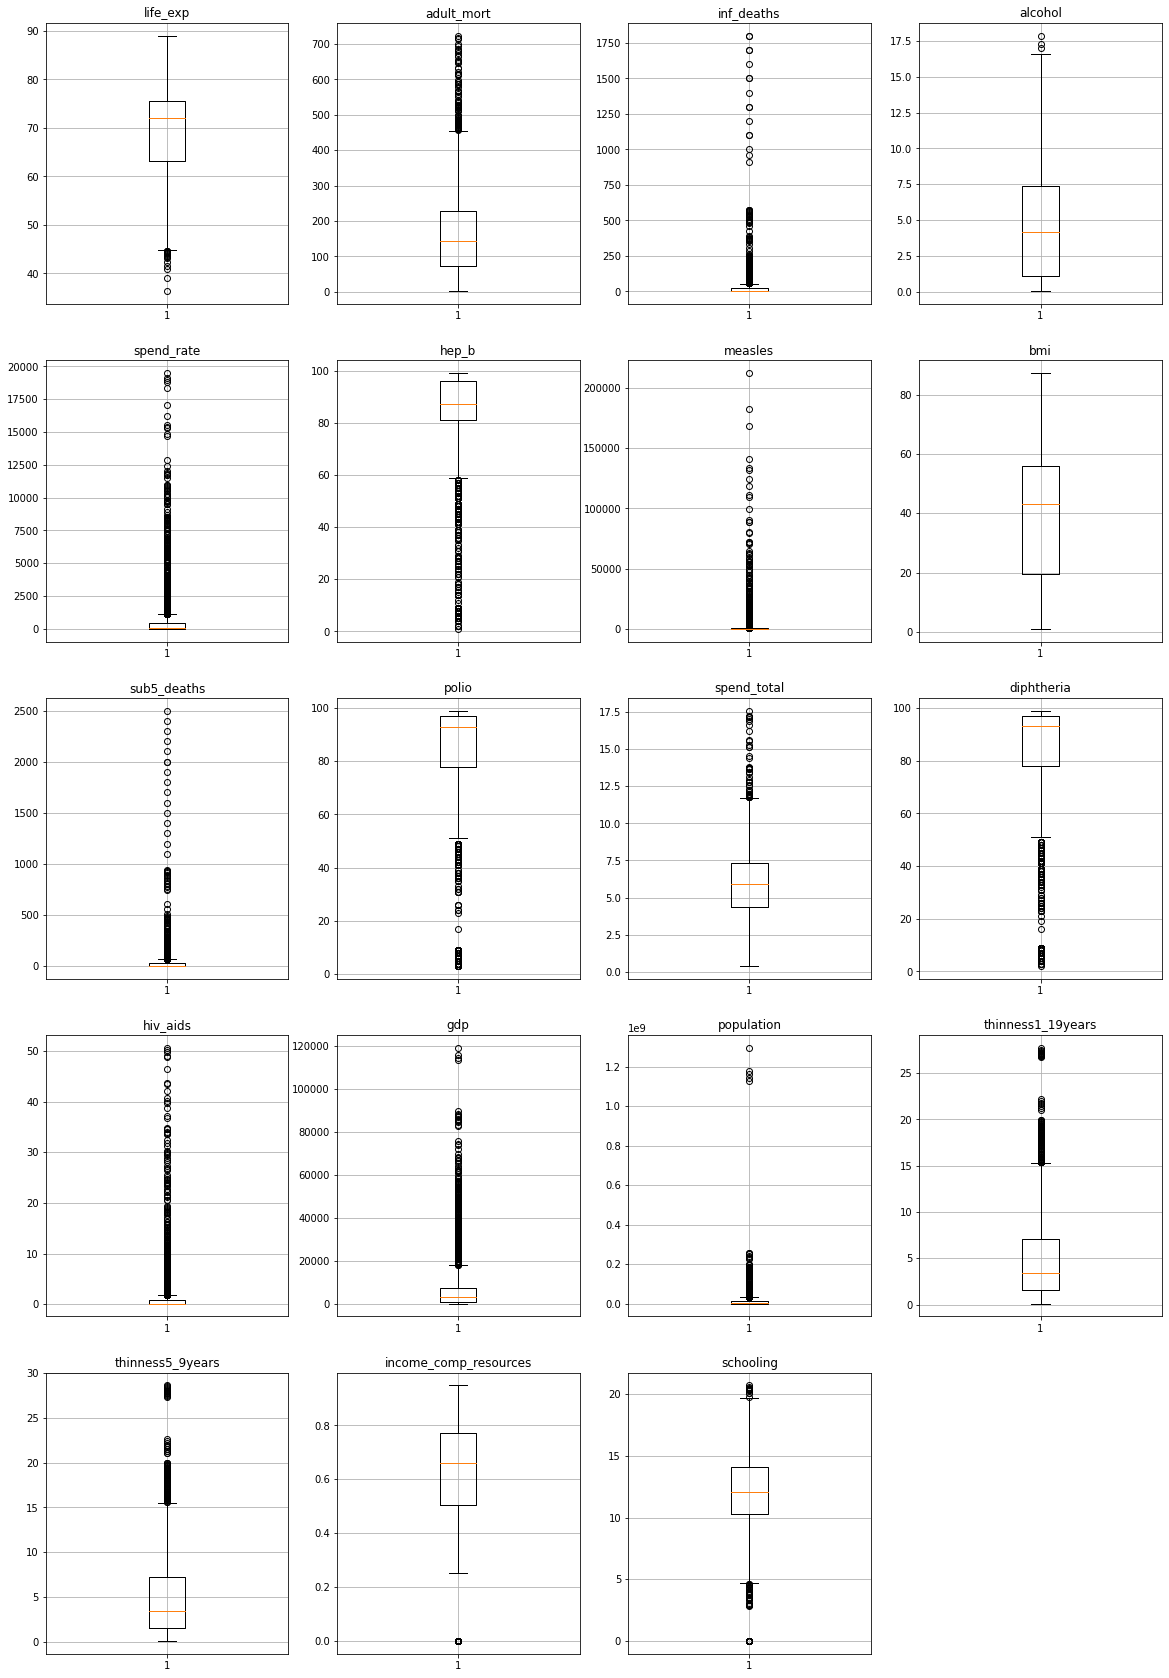

In [7]:
col_dict = {'life_exp':1,'adult_mort':2,'inf_deaths':3,'alcohol':4,'spend_rate':5,'hep_b':6,'measles':7,'bmi':8,'sub5_deaths':9,'polio':10,'spend_total':11,'diphtheria':12,'hiv_aids':13,'gdp':14,'population':15,'thinness1_19years':16,'thinness5_9years':17,'income_comp_resources':18,'schooling':19}

fig = plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life[variable])
                     plt.title(variable)
                     plt.grid(True)

Chosen to remove outliers from 3 plots: measles, infant deaths and sub5_deaths (deaths under the age of 5).

In [8]:
life= life[life['inf_deaths']<=1000]
life= life[life['measles']<=1000]
life= life[life['sub5_deaths']<=1000]

In [9]:
print(life.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 1 to 2936
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2413 non-null   object 
 1   year                   2413 non-null   int64  
 2   status                 2413 non-null   object 
 3   life_exp               2413 non-null   float64
 4   adult_mort             2413 non-null   float64
 5   inf_deaths             2413 non-null   int64  
 6   alcohol                2413 non-null   float64
 7   spend_rate             2413 non-null   float64
 8   hep_b                  2413 non-null   float64
 9   measles                2413 non-null   int64  
 10  bmi                    2413 non-null   float64
 11  sub5_deaths            2413 non-null   int64  
 12  polio                  2413 non-null   float64
 13  spend_total            2413 non-null   float64
 14  diphtheria             2413 non-null   float64
 15  hiv_

#### Life Expectancy as a Function of GDP 

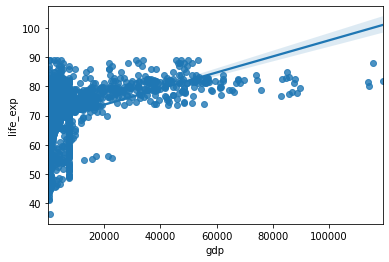

In [10]:
sns.regplot(x="gdp", y="life_exp", data=life)
plt.show()

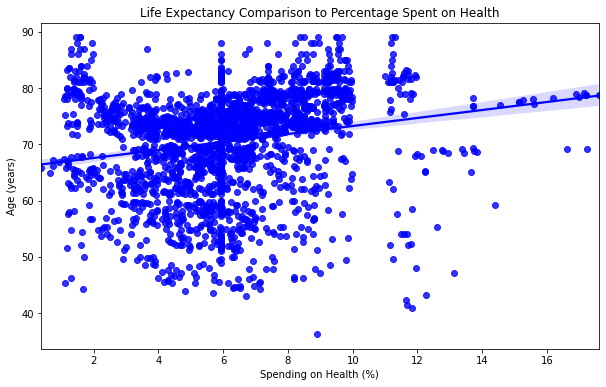

<function matplotlib.pyplot.clf>

In [11]:
#plot life_exp by health spending rate
#original csv mixed up spend_percentage column with spend_total column
fig, ax = plt.subplots(figsize=(10,6))
sns.regplot(x="spend_total", y="life_exp", color = "blue", ax = ax, data=life)
plt.title("Life Expectancy Comparison to Percentage Spent on Health")
plt.xlabel("Spending on Health (%)")
plt.ylabel("Age (years)")
plt.show()
plt.clf

These two plots indicate that gdp per capita may be a stronger factor than health spending in general in life expectancy; suggests throwing money at "health" may be missing other factors that go along with better gdp.
Some countries with lower percentage spent on health have higher life expectancy than those with spending near the top.This may be due to lifestyle factors such as diet, amount of exercise, social support, etc. not present in this data.

### Change in Life Expectancy Over Time

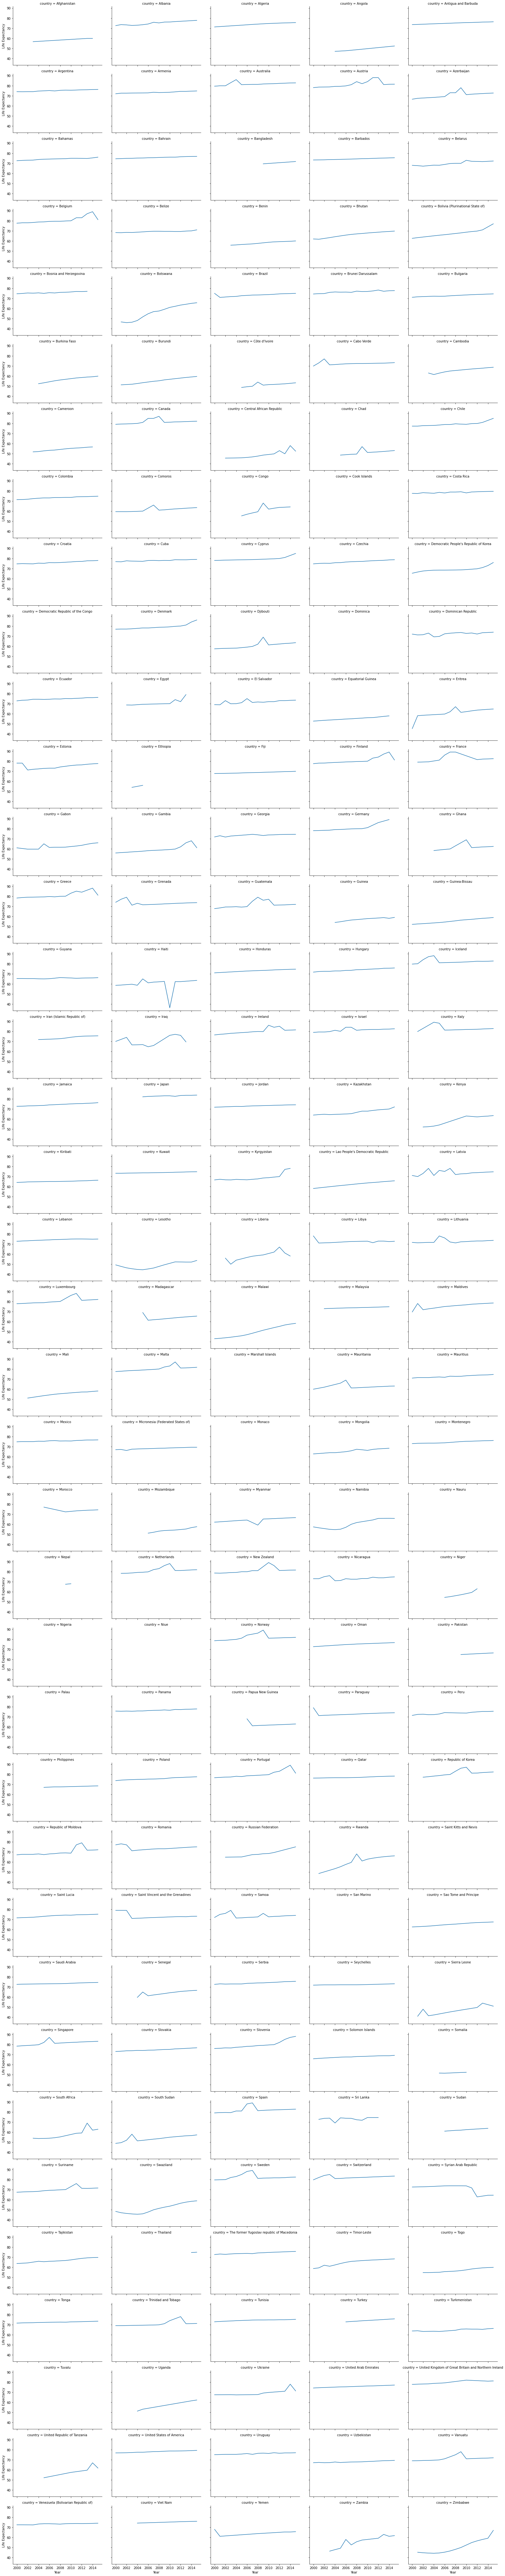

In [12]:
g = sns.FacetGrid(life, col='country', height=3, aspect=1.5, col_wrap=5)
g = g.map(plt.plot, 'year', 'life_exp')
g.set_axis_labels("Year", "Life Expectancy")
plt.show()

#### Difference Between Developed and Developing Countries 

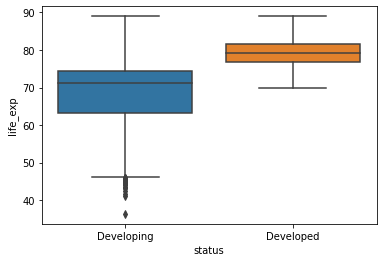

In [13]:
sns.boxplot(x="status",
 y="life_exp",
 data=life)
plt.show()

Higher life expectancy observed in developled countries. 

#### Developed vs. Developing by Year 

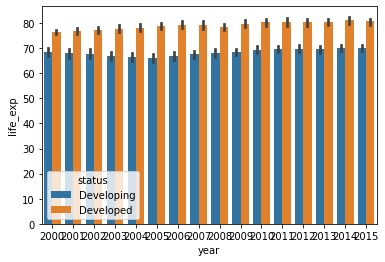

In [14]:
sns.barplot(x="year", y="life_exp", hue = "status", data=life)

### Distribution of The Data 

(array([  3.,  37.,  67., 150., 198., 297., 510., 754., 334.,  63.]),
 array([36.3 , 41.57, 46.84, 52.11, 57.38, 62.65, 67.92, 73.19, 78.46,
        83.73, 89.  ]),
 <a list of 10 Patch objects>)

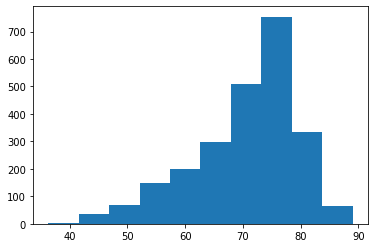

In [15]:
plt.hist(x = "life_exp", data = life) 

Data skews to the right. 

#### Correlation 

In [16]:
life.corr()

,year,life_exp,adult_mort,inf_deaths,alcohol,spend_rate,hep_b,measles,bmi,sub5_deaths,polio,spend_total,diphtheria,hiv_aids,gdp,population,thinness1_19years,thinness5_9years,income_comp_resources,schooling,gdp_rate
year,1.000000,0.106115,-0.062837,0.018111,-0.107076,0.018897,0.079430,-0.011958,0.055765,0.011966,0.040785,0.043119,0.080735,-0.113317,0.078629,0.032530,0.007612,0.008969,0.206726,0.146462,0.004080
life_exp,0.106115,1.000000,-0.715531,-0.392259,0.396386,0.380542,0.165564,-0.205637,0.521510,-0.424413,0.380908,0.193434,0.389966,-0.566086,0.427329,0.063378,-0.523962,-0.526488,0.675398,0.710010,0.050930
adult_mort,-0.062837,-0.715531,1.000000,0.281307,-0.188936,-0.241435,-0.131998,0.137851,-0.376152,0.304010,-0.249129,-0.111853,-0.240130,0.529128,-0.278410,-0.022131,0.371985,0.377311,-0.452148,-0.458209,-0.042785
inf_deaths,0.018111,-0.392259,0.281307,1.000000,-0.189435,-0.138886,-0.110279,0.308503,-0.258317,0.990513,-0.216177,-0.059522,-0.218261,0.140725,-0.161867,0.227509,0.300897,0.314100,-0.245315,-0.320234,-0.030849
alcohol,-0.107076,0.396386,-0.188936,-0.189435,1.000000,0.329216,0.047162,-0.141317,0.281382,-0.187525,0.176588,0.283348,0.184995,-0.064372,0.301281,0.046279,-0.438961,-0.426044,0.408478,0.478805,-0.018378
spend_rate,0.018897,0.380542,-0.241435,-0.138886,0.329216,1.000000,-0.014236,0.002001,0.202115,-0.135932,0.123128,0.167030,0.118236,-0.093052,0.892015,0.001631,-0.261243,-0.263079,0.370120,0.381456,0.026308
hep_b,0.079430,0.165564,-0.131998,-0.110279,0.047162,-0.014236,1.000000,-0.089932,0.080089,-0.122155,0.407427,0.023958,0.522721,-0.111703,0.038582,0.024568,-0.021356,-0.025735,0.123510,0.131128,0.030539
measles,-0.011958,-0.205637,0.137851,0.308503,-0.141317,0.002001,-0.089932,1.000000,-0.134959,0.306626,-0.129740,-0.064711,-0.111831,0.108229,-0.025268,0.085326,0.229953,0.230316,-0.120481,-0.175873,-0.023098
bmi,0.055765,0.521510,-0.376152,-0.258317,0.281382,0.202115,0.080089,-0.134959,1.000000,-0.275926,0.200305,0.199234,0.205306,-0.238892,0.243746,0.063200,-0.534736,-0.539122,0.445027,0.465596,-0.029015
sub5_deaths,0.011966,-0.424413,0.304010,0.990513,-0.187525,-0.135932,-0.122155,0.306626,-0.275926,1.000000,-0.231736,-0.063858,-0.240994,0.160246,-0.161696,0.192895,0.305778,0.317328,-0.266018,-0.341378,-0.030050


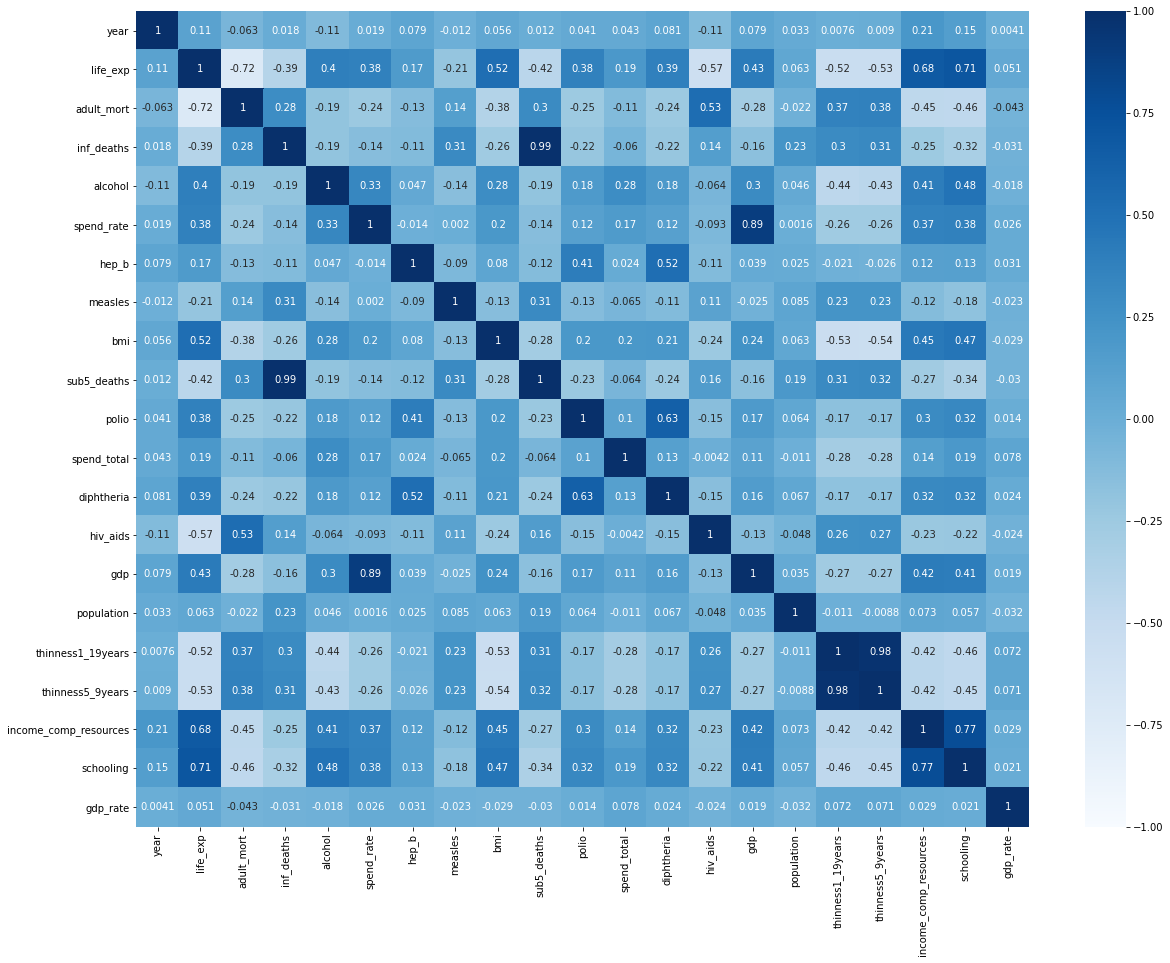

In [17]:
#Visual represation of the correlations 
plt.subplots(figsize=(20,15))
heatmap = sns.heatmap(life.corr(), vmin=-1, vmax=1, cmap='Blues', annot=True)


Columns with strong positive correlations to life expectancy:

-  income comp resources
-  schooling

Columns with strong negative correlations to life expectancy:

-  adult mortality
-  hiv_aids

Populations with educated individuals and opportunities to acheive better incomes leads to higher life expectancy.

### Nonparametric Estimation of Mean, Median and Standard Deviation Using Bootstrapping 

In [18]:
#make column of interest into array for easier indexing

life_arr = np.array(life["life_exp"])

#generate random numbers from 0 to 2412 for our row index from a uniform distribution
rand_index = np.random.randint(low=0, high=2412, size=250)

#sample column of interest using the randomized indexes
original_sample = []
x = -1
length = len(rand_index) - 1
while x < length :
    x=x+1
    new_entry = life_arr[rand_index[x]]
    original_sample.append(new_entry)
    
original_sample = np.array(original_sample)    
print(original_sample.mean())
print(np.median(original_sample), " is the original sample median")
print(np.std(original_sample))

71.15649972677596
73.2  is the original sample median
8.996207606846514


In [19]:
means_boot_samples = []
median_boot_samples = []
std_boot_samples = []

for i in range(1000):
                boot_sample = np.random.choice(original_sample, 100)
                means_boot_samples.append(boot_sample.mean())
                median_boot_samples.append(np.median(boot_sample))
                std_boot_samples.append(np.std(boot_sample))
            
        
print(np.mean(means_boot_samples))
print(np.mean(median_boot_samples), " is the bootstrapping median")
print(np.mean(std_boot_samples))

71.1460039487705
73.26035  is the bootstrapping median
8.933561470111092


In [20]:
conf_int1 = np.percentile(means_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int1)
conf_int2 = np.percentile(median_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int2)
conf_int3 = np.percentile(std_boot_samples, [2.5, 97.5]) # The middle 95% interval
print(conf_int3)

[69.25798123 72.81714308]
[72.5 74.1]
[ 7.35490497 10.53713368]


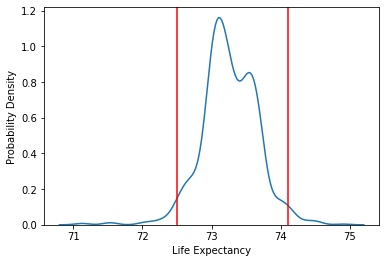

In [21]:
sns.kdeplot(median_boot_samples)
for endpoint in conf_int2:
    plt.axvline(endpoint, color='red')
plt.xlabel('Life Expectancy')
plt.ylabel('Probability Density')      
plt.show()


Like the histogram above, the data continues to skew to the right. 

### Boostrapping From a Different Perspective

In [22]:
#ANOTHER PYTHON METHOD OF BOOTSTRAPPING FOR ESTIMATION OF SAME STATISTICS
from sklearn.utils import resample
means_boot_samples = []
median_boot_samples = []
std_boot_samples = []

for i in range(1000):
                boot_sample = resample(original_sample)
                means_boot_samples.append(boot_sample.mean())
                median_boot_samples.append(np.median(boot_sample))
                std_boot_samples.append(np.std(boot_sample))
        
print(np.mean(means_boot_samples))
print(np.mean(median_boot_samples), " is the bootstrapping median, using sklearn library")
print(np.mean(std_boot_samples))

71.15222462759563
73.26145000000001  is the bootstrapping median, using sklearn library
8.972560982437498
